# Predição de Salário com Regressão Linear Simples 💼📈

**Objetivo:**  
Usar o dataset `Salary_dataset.csv` para criar um modelo de **Regressão Linear Simples**, capaz de **estimar o salário com base nos anos de experiência**.

O modelo busca responder:  
> "Quanto o salário tende a aumentar a cada ano adicional de experiência?"

Além disso, será feita análise exploratória, visualização da relação entre as variáveis e avaliação do modelo com métricas estatísticas.


In [12]:
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [13]:
uploaded_file = files.upload()

Saving Salary_dataset.csv to Salary_dataset (3).csv


In [14]:
# Carregar o dataset
df = pd.read_csv("Salary_dataset.csv")

# Exibir primeiras linhas
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [15]:
# Informações gerais
print("Dimensões:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

print("\nValores ausentes:")
print(df.isnull().sum())

print("\nEstatísticas descritivas:")
display(df.describe())

Dimensões: (30, 3)

Tipos de dados:
Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

Valores ausentes:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Estatísticas descritivas:


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


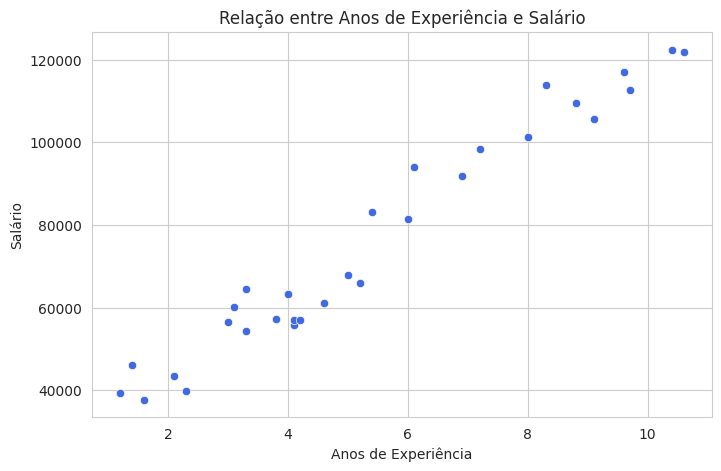

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='YearsExperience', y='Salary', color='royalblue')
plt.title("Relação entre Anos de Experiência e Salário")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.show()

### Observação sobre o gráfico

A relação entre **anos de experiência** e **salário** é **positiva e aproximadamente linear** — ou seja, conforme o tempo de experiência aumenta, o salário também tende a crescer de forma proporcional.

Isso confirma que a **Regressão Linear Simples** é adequada para esse tipo de dado.


In [17]:
# Separar variável independente (X) e dependente (y)
X = df[['YearsExperience']]
y = df['Salary']

# Dividir em treino e teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamanho do treino:", X_train.shape[0])
print("Tamanho do teste:", X_test.shape[0])

Tamanho do treino: 24
Tamanho do teste: 6


In [18]:
# Criar modelo
model = LinearRegression()

# Treinar
model.fit(X_train, y_train)

# Coeficientes
coef = model.coef_[0]
intercept = model.intercept_

print(f"Coeficiente angular (slope): {coef:.2f}")
print(f"Intercepto (b0): {intercept:.2f}")
print(f"\nEquação do modelo: Salário = {intercept:.2f} + {coef:.2f} × Anos de Experiência")

Coeficiente angular (slope): 9423.82
Intercepto (b0): 24380.20

Equação do modelo: Salário = 24380.20 + 9423.82 × Anos de Experiência


In [19]:
# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Avaliação no conjunto de teste:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

Avaliação no conjunto de teste:
MAE  = 6286.45
RMSE = 7059.04
R²   = 0.9024


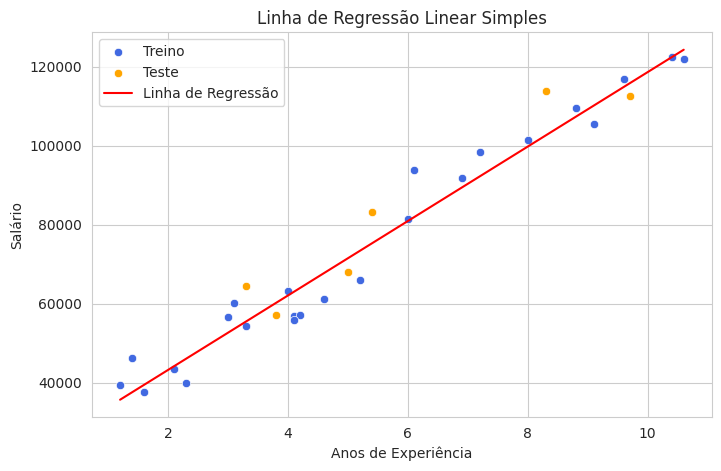

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train.values.flatten(), y=y_train, label='Treino', color='royalblue')
sns.scatterplot(x=X_test.values.flatten(), y=y_test, label='Teste', color='orange')
plt.plot(X, model.predict(X), color='red', label='Linha de Regressão')
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.title("Linha de Regressão Linear Simples")
plt.legend()
plt.show()

### Interpretação dos resultados

A equação da regressão tem a forma:

**Salário = b₀ + b₁ × Anos de Experiência**

Onde:

- **b₀ (intercepto)** representa o salário estimado quando os anos de experiência são zero.  
- **b₁ (coeficiente angular)** mostra quanto o salário tende a aumentar a cada ano adicional de experiência.

Pelos resultados:

- O coeficiente positivo indica uma relação **diretamente proporcional** — ou seja, quanto maior a experiência, maior o salário esperado.  
- O valor de **R²** mostra quanto da variação do salário é explicada pelos anos de experiência.  
  - Exemplo: se R² = 0.95, significa que o modelo explica **95% da variação** do salário observada nos dados.


In [21]:
# Exemplo: prever salário para 5, 8 e 12 anos de experiência
anos = np.array([[5], [8], [12]])
salarios_previstos = model.predict(anos)

for i in range(len(anos)):
    print(f"Experiência: {anos[i][0]} anos → Salário estimado: R${salarios_previstos[i]:,.2f}")

Experiência: 5 anos → Salário estimado: R$71,499.28
Experiência: 8 anos → Salário estimado: R$99,770.72
Experiência: 12 anos → Salário estimado: R$137,465.99


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Conclusão

- O modelo de **Regressão Linear Simples** se ajustou muito bem aos dados, mostrando uma **forte relação linear** entre experiência e salário.  
- O **R² alto** indica que a maior parte da variação no salário é explicada pela experiência.  
- O **erro médio (MAE/RMSE)** é baixo, mostrando boa precisão preditiva.

**Conclusão prática:**  
Cada ano adicional de experiência representa um aumento consistente no salário médio.  
O modelo é simples, interpretável e pode ser usado como **ferramenta de estimativa inicial** em cenários de RH, consultoria ou planejamento salarial.